<h1 style="text-align:center">Content Aware Fill</h1>

<h3 style="text-align:center">2. Kolokvij</h3>

In [118]:
from skimage.io import imread
from skimage.restoration import inpaint_biharmonic
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform, restoration

In [119]:
# slika_og = 'Slike/01_Lena.JPG'
# maska_og = 'Slike/02_Lena_maska.JPG'

slika_og = 'Slike/vojnik.JPG'
maska_og = 'Slike/vojnik_maska1.JPG'

(np.float64(-0.5), np.float64(427.5), np.float64(620.5), np.float64(-0.5))

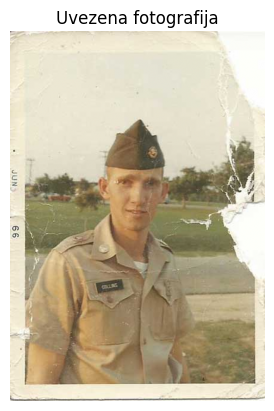

In [120]:
damaged_image = imread(slika_og)
image_rescaled = transform.rescale(damaged_image, 1, anti_aliasing=False, channel_axis=-1)

plt.imshow(image_rescaled)
plt.title('Uvezena fotografija')
plt.axis('off')

(np.float64(-0.5), np.float64(427.5), np.float64(620.5), np.float64(-0.5))

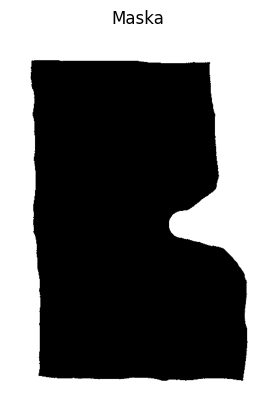

In [121]:
mask = imread(maska_og)
mask_rescaled = transform.rescale(mask, 1, anti_aliasing=False, channel_axis=-1)

mask_rescaled = mask_rescaled > 0.5
mask_rescaled = np.array(mask_rescaled, np.float64)

plt.imshow(mask_rescaled)
plt.title('Maska')
plt.axis('off')

(np.float64(-0.5), np.float64(427.5), np.float64(620.5), np.float64(-0.5))

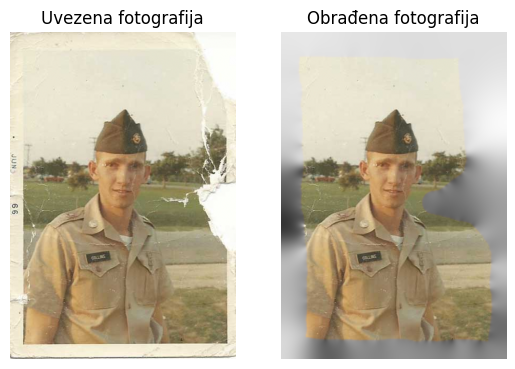

In [122]:
restored_image = restoration.inpaint_biharmonic(image_rescaled, mask_rescaled)

f, ax = plt.subplots(1,2)
ax[0].imshow(image_rescaled)
ax[0].set_title('Uvezena fotografija')
ax[0].axis('off')

ax[1].imshow(restored_image)
ax[1].set_title('Obrađena fotografija')
ax[1].axis('off')


Originalni oblik slike (image_rescaled): (621, 428, 3)
Originalni oblik maske (mask_rescaled): (621, 428, 3)
Maska ima 3 kanala, konvertujem u 2D masku uzimanjem prvog kanala.
Konvertujem tip podataka maske iz float64 u bool.
Novi oblik maske (mask_2d): (621, 428)
Inpainting uspešno izvršen!


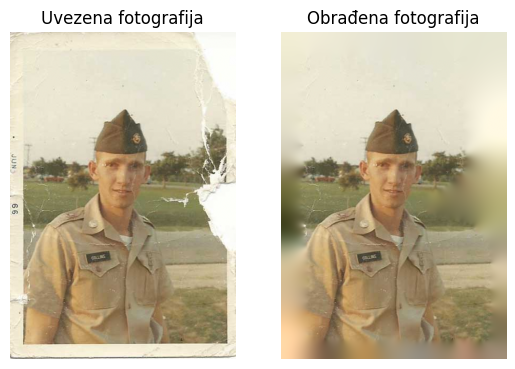

In [123]:
print(f"Originalni oblik slike (image_rescaled): {image_rescaled.shape}")
print(f"Originalni oblik maske (mask_rescaled): {mask_rescaled.shape}")

# Proveri da li maska ima 3 dimenzije i da li je treća dimenzija za kanale
if mask_rescaled.ndim == 3 and image_rescaled.ndim == 3 and mask_rescaled.shape[-1] == image_rescaled.shape[-1]:
    print("Maska ima 3 kanala, konvertujem u 2D masku uzimanjem prvog kanala.")

    mask_2d = mask_rescaled[:, :, 0]

    if not np.issubdtype(mask_2d.dtype, np.bool_):
        print(f"Konvertujem tip podataka maske iz {mask_2d.dtype} u bool.")
        mask_2d = mask_2d > 0 
        mask_2d = mask_2d.astype(bool)

    print(f"Novi oblik maske (mask_2d): {mask_2d.shape}")
else:
    mask_2d = mask_rescaled
    if mask_2d.ndim != 2:
        print(f"Upozorenje: Očekivana je 2D maska nakon konverzije, ali je oblik: {mask_2d.shape}")


# Sada koristi mask_2d za inpainting
try:
    restored_image = inpaint_biharmonic(
        image_rescaled,
        mask_2d,
        channel_axis=-1
    )
    print("Inpainting uspešno izvršen!")

    f, ax = plt.subplots(1,2)
    ax[0].imshow(image_rescaled, cmap='gray')
    ax[0].set_title('Uvezena fotografija')
    ax[0].axis('off')
    
    ax[1].imshow(restored_image, cmap='gray')
    ax[1].set_title('Obrađena fotografija')
    ax[1].axis('off')
except ValueError as e:
    print(f"Došlo je do greške i nakon prilagođavanja maske: {e}" \
          f"Oblik slike za inpainting: {image_rescaled.shape}" \
          f"Oblik maske za inpainting: {mask_2d.shape}" \
          f"Tip podataka maske: {mask_2d.dtype}"
    )